아빠 : 64.45753424657535, 엄마 : 61.72054794520548, 누나 : 32.775342465753425, 나 : 30.295890410958904


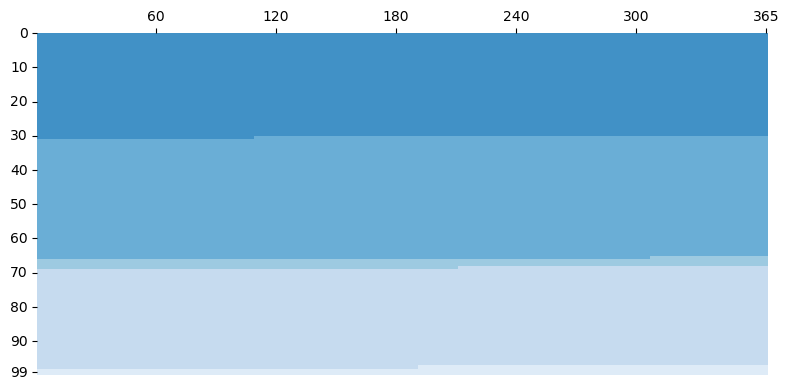

In [1]:
from datetime import datetime, timedelta

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

년수 = 100
_1년 = 365
_100년 = _1년*년수

지금 = datetime.now()

나의_태어난날 = datetime(1994,4,21)
나의_살아온날 = (지금 - 나의_태어난날).days
나의_나이 = 나의_살아온날/_1년

아빠의_태어난날 = datetime(1960,3,1)
아빠의_살아온날 = (지금 - 아빠의_태어난날).days
아빠의_나이 = 아빠의_살아온날/_1년

엄마의_태어난날 = datetime(1962,11,25)
엄마의_살아온날 = (지금 - 엄마의_태어난날).days
엄마의_나이 = 엄마의_살아온날/_1년

누나의_태어난날 = datetime(1991,10,29)
누나의_살아온날 = (지금 - 누나의_태어난날).days
누나의_나이 = 누나의_살아온날/_1년

print(
    f'아빠 : {아빠의_나이}, 엄마 : {엄마의_나이}, 누나 : {누나의_나이}, 나 : {나의_나이}'
    )

나의_100년의날들 = np.concatenate((np.ones(나의_살아온날), np.zeros(_100년-나의_살아온날)))
아빠의_100년의날들 = np.concatenate((np.ones(나의_살아온날+_100년-아빠의_살아온날), np.zeros(아빠의_살아온날-나의_살아온날)))
엄마의_100년의날들 = np.concatenate((np.ones(나의_살아온날+_100년-엄마의_살아온날), np.zeros(엄마의_살아온날-나의_살아온날)))
누나의_100년의날들 = np.concatenate((np.ones(나의_살아온날+_100년-누나의_살아온날), np.zeros(누나의_살아온날-나의_살아온날)))
나와가족_100년의날들 = 나의_100년의날들+아빠의_100년의날들+엄마의_100년의날들+누나의_100년의날들

달력 = pd.DataFrame(나와가족_100년의날들.reshape(년수, 365), columns=range(1,366), index=range(0,년수))

# plot

fig, ax = plt.subplots(figsize=(8,4))

_100년의달력 = sns.heatmap(달력, xticklabels=달력.columns[::30], cmap='Blues', vmin=-1, vmax=7, cbar=False, ax=ax)
ax.xaxis.tick_top()
_100년의달력.set_xticklabels(_100년의달력.get_xticklabels(), rotation=0)
_100년의달력.set_yticklabels(_100년의달력.get_yticklabels(), rotation=0)
plt.xticks(np.array([59, 119, 179, 239, 299, 364]), 달력.columns[[59, 119, 179, 239, 299, 364]])
plt.yticks(np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]), 달력.index[[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]])
plt.tight_layout()